In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [32]:
# data = pd.read_csv('./HWM_Optimization/Iter6/HWM_Combined_Opt.csv')
# fpath = 'H:/My Drive/CODE/HAND/HWM/Iter3/HWM_Combined_Opt.csv'
fpath = 'H:/My Drive/CODE/HAND/HWM/Iter3/HWM_GAGE_Combined_Opt.csv'
data = pd.read_csv(fpath)
data = data.drop(labels=['Cleaning_note','Error_note','SITE_ID','NAME','time_file'],axis='columns')
# data.describe()

data.dtypes

SITE_NUM              float64
HWM_ID                float64
LAT_DD                float64
LON_DD                float64
ELEV_NAVD88_ft        float64
ELEV_NAVD88_m         float64
DEM_m                 float64
HAND_m                float64
COMID                 float64
Inun_m                float64
Stream_H_m            float64
fmax                  float64
roughness             float64
rmse                  float64
Predict_Stream_H_m    float64
dtype: object

In [ ]:
# data['RMSE'] = ''
# for catch in data.COMID.unique():
#     subset = data.loc[data.COMID == catch]
#     rmse = ((subset.Stream_H_m - subset.Predict_Stream_H_m) ** 2).mean() ** .5
#     data.RMSE.loc[data.COMID == catch] = rmse
# data.to_csv('./Iter6/HWM_Combined_Opt_Head_RMSE.csv')

In [ ]:
# data.to_csv('./Iter4/HWM_Combined_Opt_update.csv')

data

In [33]:
catch = pd.read_csv('H:/My Drive/CODE/HAND/Catchment Data/Catchment_Regression_Data.csv')
catch2 = catch[['CatchId','StreamOrde']]
data = data.merge(catch2, left_on='COMID', right_on='CatchId', how='left')
# data.to_csv(fpath[:-4] + '_ord.csv')

In [25]:
data.index.size

1042

In [ ]:
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.set_theme()
# sns_plot = sns.pairplot(data[['Stream_H_m', 'StreamOrde', 'fmax', 'Predict_Stream_H_m', 'roughness', 'rmse']])
# sns_plot.savefig("output.png")

# sns_plot

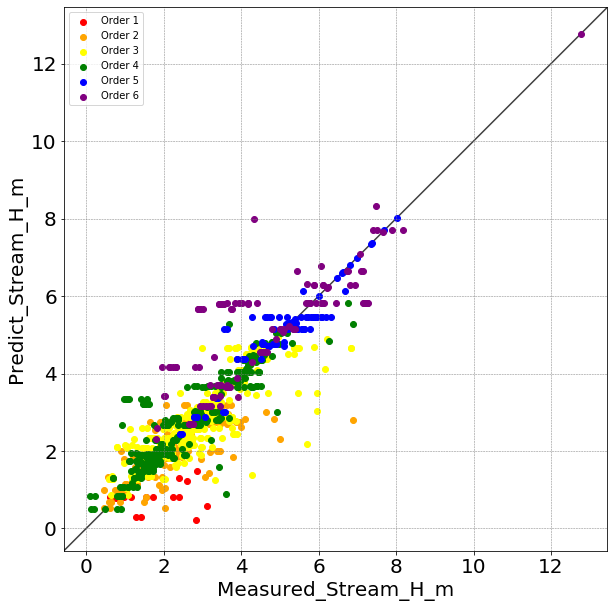

In [34]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==1], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==1],label='Order 1',c='red')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==2], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==2],label='Order 2',c='orange')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==3], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==3],label='Order 3',c='yellow')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==4], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==4],label='Order 4',c='green')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==5], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==5],label='Order 5',c='blue')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==6], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==6],label='Order 6',c='purple')
ax.legend()
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.xlabel("Measured_Stream_H_m")
plt.ylabel("Predict_Stream_H_m")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')


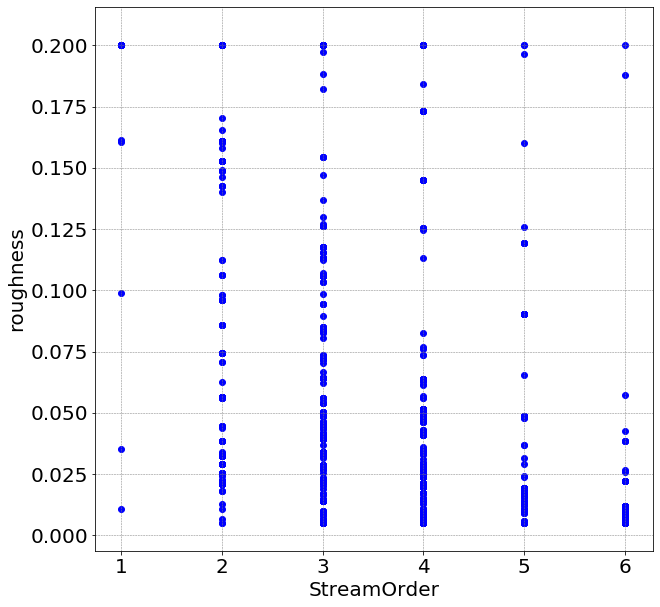

In [35]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=data['StreamOrde'].loc[data.StreamOrde==1], y=data['roughness'].loc[data.StreamOrde==1],label='Order 1',c='b')#c='red')
ax.scatter(x=data['StreamOrde'].loc[data.StreamOrde==2], y=data['roughness'].loc[data.StreamOrde==2],label='Order 2',c='b')#c='orange')
ax.scatter(x=data['StreamOrde'].loc[data.StreamOrde==3], y=data['roughness'].loc[data.StreamOrde==3],label='Order 3',c='b')#c='yellow')
ax.scatter(x=data['StreamOrde'].loc[data.StreamOrde==4], y=data['roughness'].loc[data.StreamOrde==4],label='Order 4',c='b')#c='green')
ax.scatter(x=data['StreamOrde'].loc[data.StreamOrde==5], y=data['roughness'].loc[data.StreamOrde==5],label='Order 5',c='b')#c='blue')
ax.scatter(x=data['StreamOrde'].loc[data.StreamOrde==6], y=data['roughness'].loc[data.StreamOrde==6],label='Order 6',c='b')#c='purple')
# ax.legend()
# lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)
plt.xlabel("StreamOrder")
plt.ylabel("roughness")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')


In [11]:
data = data.dropna(subset=['Predict_Stream_H_m'])
print(data.index.size)

982


In [12]:
rmse = ((data['Stream_H_m'] - data['Predict_Stream_H_m']) ** 2).mean() ** .5
print("\nRMSE = " + str(round(rmse,6)))
# Before slope adjustments RMSE = 1.251442
# Local slope adjustments  RMSE = 0.681572
# Local slope adjustments + minumum slope of 0.00003 RMSE = 0.652268


RMSE = 0.652268


In [13]:
correlation_matrix = np.corrcoef(data['Stream_H_m'], data['Predict_Stream_H_m'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared
# Before slope adjustments r²=0.477
# After  slope ajudstments r²=0.793

0.798960172787688

In [14]:
import scipy
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data['Stream_H_m'], data['Predict_Stream_H_m'])
# print(slope, intercept, r_value, p_value, std_err)
scipy.stats.linregress(data['Stream_H_m'], data['Predict_Stream_H_m'])

LinregressResult(slope=0.8671710501933659, intercept=0.4535120705833373, rvalue=0.8938457209092003, pvalue=0.0, stderr=0.013895373305366004)

In [15]:
data

,Unnamed: 0,Unnamed: 0.1,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,ELEV_NAVD88_ft,ELEV_NAVD88_m,...,Stream_H_m,Cleaning_note,Error_note,fmax,time_file,roughness,rmse,Predict_Stream_H_m,CatchId,StreamOrde
7,7,7,NaN,NaN,Somerset,38,40.554048,-74.583915,47.4109,14.450842,...,6.623391,9513368 to 9513852,Should be comid 9513852 20110828_18 1597.179964,1597.179964,20110828_18,0.005874,4.564539e-06,6.623395,9513852.0,5.0
8,8,8,145.0,1.0,WANQ2,WANQ2_1,41.006944,-74.292556,197.7310,60.268409,...,1.977454,slope recalc,Downstream of the Wanaque reservoir - human co...,561.659987,20110828_15,0.005000,8.580067e-01,2.667674,6246206.0,4.0
9,9,9,145.0,2.0,WANQ2,WANQ2_2,41.006889,-74.292639,198.0510,60.365945,...,2.074990,slope recalc,Downstream of the Wanaque reservoir - human co...,561.659987,20110828_15,0.005000,8.580067e-01,2.667674,6246206.0,4.0
10,10,10,145.0,3.0,WANQ2,WANQ2_3,41.006583,-74.292667,197.6510,60.244025,...,2.358962,slope recalc,Downstream of the Wanaque reservoir - human co...,561.659987,20110828_15,0.005000,8.580067e-01,2.667674,6246206.0,4.0
11,11,11,145.0,4.0,WANQ2,WANQ2_4,41.006556,-74.292528,198.1610,60.399473,...,2.108518,slope recalc,Downstream of the Wanaque reservoir - human co...,561.659987,20110828_15,0.005000,8.580067e-01,2.667674,6246206.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,997,997,NaN,NaN,Somerset,41,40.599510,-74.672659,75.3170,22.956622,...,3.813441,NaN,NaN,782.619982,20110828_14,0.076077,1.651314e-07,3.813441,9513148.0,4.0
998,998,998,NaN,NaN,Somerset,18,40.500766,-74.584019,44.9056,13.687227,...,4.714202,NaN,NaN,987.729978,20110828_16,0.196399,1.168382e-07,4.714202,9513658.0,5.0
999,999,999,NaN,NaN,Somerset,61,40.585048,-74.508256,38.7454,11.809598,...,3.390776,NaN,NaN,213.399995,20110828_07,0.064588,1.166406e-07,3.390776,9513328.0,3.0
1000,1000,1000,NaN,NaN,Somerset,49,40.468158,-74.648728,71.0831,21.666129,...,2.084307,NaN,NaN,44.249999,20110828_05,0.062688,1.078111e-07,2.084308,9514754.0,2.0


In [16]:
catch = data.drop_duplicates(subset='COMID')
# catch = catch.drop(labels=['SITE_NUM', 'HWM_ID', 'SITE_ID', 'NAME', 'LAT_DD', 'LON_DD', 'HWM_ELEV_ft', \
#         'HWM_ELEV_m','DEM_m','HAND_m','Inun_Depth_m', 'time_file'], axis='columns')
catch

,Unnamed: 0,Unnamed: 0.1,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,ELEV_NAVD88_ft,ELEV_NAVD88_m,...,Stream_H_m,Cleaning_note,Error_note,fmax,time_file,roughness,rmse,Predict_Stream_H_m,CatchId,StreamOrde
7,7,7,NaN,NaN,Somerset,38,40.554048,-74.583915,47.4109,14.450842,...,6.623391,9513368 to 9513852,Should be comid 9513852 20110828_18 1597.179964,1597.179964,20110828_18,0.005874,4.564539e-06,6.623395,9513852.0,5.0
8,8,8,145.0,1.0,WANQ2,WANQ2_1,41.006944,-74.292556,197.7310,60.268409,...,1.977454,slope recalc,Downstream of the Wanaque reservoir - human co...,561.659987,20110828_15,0.005000,8.580067e-01,2.667674,6246206.0,4.0
17,17,17,56.0,2.0,PASS3,PASS3_2,40.864833,-74.109389,14.9250,4.549140,...,4.549140,slope revise,"tidal? Catchment has minimum slope of 0.00001,...",2489.409944,20110829_04,0.008737,5.713186e-02,4.563997,6251128.0,6.0
24,24,24,55.0,1.0,PASS2,PASS2_1,40.822222,-74.123278,11.2725,3.435858,...,3.435858,slope revise,"tidal? Catchment has minimum slope of 0.00001,...",2472.239945,20110829_06,0.005000,2.232903e+00,5.806001,6251234.0,6.0
31,31,31,54.0,1.0,PASS1,PASS1_1,40.786056,-74.148361,9.5150,2.900172,...,2.900172,slope revise,"tidal? Catchment has minimum slope of 0.00001,...",2449.529945,20110829_08,0.005000,2.511118e+00,5.654670,6251308.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,997,997,NaN,NaN,Somerset,41,40.599510,-74.672659,75.3170,22.956622,...,3.813441,NaN,NaN,782.619982,20110828_14,0.076077,1.651314e-07,3.813441,9513148.0,4.0
998,998,998,NaN,NaN,Somerset,18,40.500766,-74.584019,44.9056,13.687227,...,4.714202,NaN,NaN,987.729978,20110828_16,0.196399,1.168382e-07,4.714202,9513658.0,5.0
999,999,999,NaN,NaN,Somerset,61,40.585048,-74.508256,38.7454,11.809598,...,3.390776,NaN,NaN,213.399995,20110828_07,0.064588,1.166406e-07,3.390776,9513328.0,3.0
1000,1000,1000,NaN,NaN,Somerset,49,40.468158,-74.648728,71.0831,21.666129,...,2.084307,NaN,NaN,44.249999,20110828_05,0.062688,1.078111e-07,2.084308,9514754.0,2.0


In [17]:
# subset = data.loc[data.StreamOrde == 1]
# subset.COMID.unique()

In [18]:
catch = data.drop_duplicates(subset='COMID')
print("Order  Avg_Fmax_m3s Avg_H_m  Avg_rough  Avg_RMSE_m COMIDs  Pt_Count")
for order in np.sort(catch.StreamOrde.unique()):
    subset = catch.loc[catch.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.mean(),1):9}    {round(subset.Predict_Stream_H_m.mean(),1):5}  \
    {round(subset.roughness.mean(),3):6}    {round(subset.rmse.mean(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

print("Order  Med_Fmax_m3s  Med_H_m  Med_rough  Med_RMSE_m  COMIDs  Pt_Count")
for order in np.sort(catch.StreamOrde.unique()):
    subset = catch.loc[catch.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.median(),1):9}    {round(subset.Predict_Stream_H_m.median(),1):5}  \
    {round(subset.roughness.median(),3):6}    {round(subset.rmse.median(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Avg_Fmax_m3s Avg_H_m  Avg_rough  Avg_RMSE_m COMIDs  Pt_Count
 1.0        6.0      0.8       0.192        1.1       5           5
 2.0       54.8      1.8       0.085       0.38      35          35
 3.0      197.2      2.7       0.059       0.36      56          56
 4.0      532.4      2.7       0.031       0.32      53          53
 5.0     1206.5      4.8       0.043       0.19      23          23
 6.0     2666.7      4.7       0.012       0.73      18          18
Order  Med_Fmax_m3s  Med_H_m  Med_rough  Med_RMSE_m  COMIDs  Pt_Count
 1.0        0.8      0.8         0.2       0.91       5           5
 2.0       47.0      1.8       0.063       0.27      35          35
 3.0      160.0      2.6        0.04       0.25      56          56
 4.0      550.1      2.7       0.022       0.22      53          53
 5.0      994.5      5.2       0.017       0.06      23          23
 6.0     2487.6      4.5       0.007       0.37      18          18


In [21]:
catch2 = catch[catch.roughness < 0.299]
catch2 = catch2[catch2.roughness > 0.0051]

In [23]:
print("Order  Avg_Fmax  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch2.StreamOrde.unique()):
    subset = catch2.loc[catch2.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.mean(),1):9}  {round(subset.Predict_Stream_H_m.mean(),1):5}\
    {round(subset.roughness.mean(),3):6}  {round(subset.rmse.mean(),2):7}   {len(subset.COMID.unique()):7} \
    {round(len(subset),1):4}')

Order  Avg_Fmax  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count
 1.0        6.0    0.8     0.192      1.1         5        5
 2.0       54.1    1.8     0.088     0.38        34       34
 3.0      196.7    2.7     0.061     0.36        54       54
 4.0      554.6    2.9     0.036     0.21        43       43
 5.0     1179.5    4.9     0.044     0.18        22       22
 6.0     2780.9    4.9     0.017     0.21        10       10


In [24]:
print("Order  Med_Fmax  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch2.StreamOrde.unique()):
    subset = catch2.loc[catch2.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.median(),1):9}  {round(subset.Predict_Stream_H_m.median(),1):5}\
    {round(subset.roughness.median(),3):6}  {round(subset.rmse.median(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Med_Fmax  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count
 1.0        0.8    0.8       0.2     0.91       5           5
 2.0       46.7    1.8     0.067     0.29      34          34
 3.0      155.4    2.6     0.041     0.25      54          54
 4.0      550.1    2.8     0.028     0.18      43          43
 5.0      992.3    5.2     0.017     0.06      22          22
 6.0     2491.8    4.9     0.011     0.19      10          10


In [ ]:
catch.describe()

In [ ]:
catch_data1 = pd.read_csv('CatchPointsWithData_DEM.csv')
catch_data1

In [ ]:
catch_data2 = pd.read_csv('CatchPointsWithRunoffC.csv')
catch_data2

In [ ]:
catch2 = catch.merge(catch_data1, on='COMID')
catch2 = catch2.merge(catch_data2, on='COMID')
catch2

In [ ]:
catch3 = catch2.drop_duplicates(subset='COMID')
catch3

In [ ]:
# catch3.to_csv('./Iter6/HWM_Combined_Opt_DEM.csv')

In [ ]:
data_x = pd.read_csv('./Cleaned Hwm/hydrogeo-fulltable-020999.csv')
data_x

In [ ]:
data_x = data_x.drop_duplicates(subset='CatchId')
data_x

In [ ]:
catch4 = catch3.merge(data_x, left_on='COMID', right_on='CatchId')
catch4

In [ ]:
# catch4.to_csv('./Iter6/HWM_Combined_Opt_DEM.csv')